<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself. We will NOT grade this submissing w/o all the information<br>
<b>Name</b>: Jake Truongcao<br>
<b>NetID</b>: jt919<br>
<b>Recitation (01,02,90,91)</b>: 91<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>: JT


<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

## CS 439 - Introduction to Data Science
### Fall 2021

# Lab 3: Data Cleaning and Visualization

### Due Date: Sunday October 10, 2021 by 11:59 PM ###

### Instructions
This lab is presented as a notebook. Please execute the cells that are already completed and your task is to fill in the code
between ### BEGIN SOLUTION ### and ### END SOLUTION ###. 

#### Important: Please do not add any new cells or change the order of cells. If you have questions, please contact the courseS staff.

In this lab, you will be working with a dataset from NYPD containing data on calls to the New York Police Department. Information about the datasets can be found https://opendata.cityofnewyork.us/

## Setup

Note that after activating matplotlib to display figures inline via the IPython magic `%matplotlib inline`, we configure a custom default figure size. Virtually every default aspect of matplotlib [can be customized](https://matplotlib.org/users/customizing.html).

In [ ]:
!pip install datascience

In [3]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)

# Part 1:Getting Data

We will work with the NYPD Historic complaint data set. Our first task is to estimate the size of this download by looking at the number of rows, columns and using an estimated size for a column (use a reasonable value). The site metadata is available from the page
https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [4]:
### BEGIN SOLUTION
#estimated size of the download (based on metadata information from the site) = 531360000
# please explain how you reached the answer
'''
If we assume that columns have an average size of 8 bytes (some are datetime, some are varchar, some are ints):
The average size of a row is 8 * 35 = 280
multiplying this by 7.38 million rows gives you 2,066,400,000 bytes
'''
### END SOLUTION

'\nIf we assume that:\ncolumn_num = 4 bytes\ncmplnt_fr_dt = 16 bytes\ncmplnt_fr_tm = 8 bytes\ncmplnt_to_dt = 16 bytes\ncmplnt_to_tm = 8 bytes\naddr_pct_cd = 4 bytes\nrpt_dt = 16 bytes\nThen the total size of each row is 72 bytes\nmultiplying this by 7.38 million rows gives you 531,360,000 bytes\n'

### 1.1 Download the data
This file is large (use the estimate you did above). If it takes too long to download, you may want to interrupt and download the file using a browser and URL https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [4]:
import utils
data_dir = 'data'
data_url = 'https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i'

file_name = 'NYPD_Complaint_Data_Historic.csv'

# To retrieve the dataset, we will use the `utils.fetch_and_cache` utility from utils library. 
#TOOK TOO LONG!
#dest_path = utils.fetch_and_cache(data_url=data_url, file=file_name,data_dir=data_dir)
#print(f'Located at {dest_path}')

### 1.2 Inspect the size of the file
It is helpful to get an idea of the size of the file. This can be done using functions in the utils library.

In [9]:
# look at the size of the file w/o opening it using OS (https://docs.python.org/3/library/os.html). You can perform
# variety of operating system related functions from this package.
### BEGIN SOLUTION
import os
statinfo = os.stat('data\\NYPD_Complaint_Data_Historic.csv')
print(statinfo.st_size)

#### END SOLUTION

2352699423


### 1.3 Split the large file
This data file NYPD_Complaint_Data_Historic.csv is too big to load into a single DataFrame. Let us split the large file into smaller files.  Let us find out the number of lines in the NYPD_Complaint_Data_Historic.csv file using utils.

In [10]:
import utils

In [12]:
# Using utils library, find the number of lines in the file
# import pysys
### BEGIN SOLUTION
linecount = utils.line_count('data\\NYPD_Complaint_Data_Historic.csv')

### END SOLUTION
linecount

7375994

In [18]:
# Split the file into 10 smaller files. Estimate the number of lines in each file using the count above
# files should be created in the data folder and named NYPD_Complaint_Data_Historic_1.csv, 
# NYPD_Complaint_Data_Historic_2.csv, ... NYPD_Complaint_Data_Historic_10.csv etc
# It is possible that few lines from the original file may not be saved due to rounding errors.

### BEGIN SOLUTION
rowsize = 737600


lines_per_file = 737600
file_count = 1
smallfile = None
with open('data\\NYPD_Complaint_Data_Historic.csv') as bigfile:
    for lineno, line in enumerate(bigfile):
        if lineno % lines_per_file == 0:
            if smallfile:
                smallfile.close()
            small_filename = 'data\\NYPD_Complaint_Data_Historic_{}.csv'.format(file_count)
            smallfile = open(small_filename, "w")
            file_count += 1 #adds one to the file
        smallfile.write(line)
    if smallfile:
        smallfile.close()


### END SOLUTION

### 1.4 Check the files in the data folder
Now, we'll use a method of the `Pathlib.Path` class called `glob` to list all files in the `data` directory. You will find useful information in pathlib [docs](https://docs.python.org/3/library/pathlib.html).

Below, we use pathlib's `glob` method to store the list of all files' names from the `data_dir` directory in the variable `file_names`. These names should be strings that contain only the file name (e.g. `dummy.txt` not `data/dummy.txt`). The asterisk (*) character is used with the `glob` method to match any string.

In [19]:
from pathlib import Path
data_dir_path = Path('data') # creates a Path object that points to the data directory
file_names = [x.name for x in data_dir_path.glob('*') if x.is_file()]
file_names

['NYPD_Complaint_Data_Historic.csv',
 'NYPD_Complaint_Data_Historic_1.csv',
 'NYPD_Complaint_Data_Historic_10.csv',
 'NYPD_Complaint_Data_Historic_2.csv',
 'NYPD_Complaint_Data_Historic_3.csv',
 'NYPD_Complaint_Data_Historic_4.csv',
 'NYPD_Complaint_Data_Historic_5.csv',
 'NYPD_Complaint_Data_Historic_6.csv',
 'NYPD_Complaint_Data_Historic_7.csv',
 'NYPD_Complaint_Data_Historic_8.csv',
 'NYPD_Complaint_Data_Historic_9.csv']

### 1.5 Pre-processing of data
It is good to pre-process the data to see if the file can be opened in a Jupyter notebook. We need to avoid large files that can crash notebooks. Typically, files of size around 200 MB is ok to open into a DataFrame. In the following activities we will inspect the file w/o opening it as a DataFrame. Using utils.head 

In [20]:
# Use the util.head() to read up to 5 lines from the original file (w/o opening it)
from utils import head
head('data/NYPD_Complaint_Data_Historic.csv')

['CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX\n',
 '394506329,12/31/2019,17:30:00,,,32,12/31/2019,118,DANGEROUS WEAPONS,793,WEAPONS POSSESSION 3,COMPLETED,FELONY,MANHATTAN,,STREET,N.Y. POLICE DEPT,0,,,,999937,238365,,,,,40.82092679700002,-73.94332421899996,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,,UNKNOWN,UNKNOWN,E\n',
 '968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47,12/29/2019,113,FORGERY,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,BRONX,,STREET,N.Y. POLICE DEPT,0,,,,1022508,261990,,,,,40.885701406000074,-73.86164032499995,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,,UNKNOWN,UNKNOWN,

### 1.6 Inspecting and describing data columns
There should be 35 columns in each record. Using header information and data types, describe the type of data in each
column. If you are unable to determine, just state so.
##### BEGIN SOLUTION
* CMPLNT_NUM : unique complaint id
* CMPLNT_FR_DT: start date of the occurence
* CMPLNT_FR_TM: start time of the occurnece
* CMPLNT_TO_DT: end date of the occurence
* CMPLNT_TO_TM: end time of the occurence
* ADDR_PCT_CD: Precinct where it happened
* RPT_DT: not sure
* KY_CD: not sure
* OFNS_DESC: description of the offense(incident)
* PD_CD	: not sure
* PD_DESC: not sure
* CRM_ATPT_CPTD_CD: not sure
* LAW_CAT_CD: not sure
* BORO_NM: name of boro in NYC
* LOC_OF_OCCUR_DESC: where incident happened
* PREM_TYP_DESC: not sure
* JURIS_DESC: something with jurisdiction
* JURISDICTION_CODE: the jurisdiction code
* PARKS_NM: name of the park
* HOUSING_PSA: name of the housing area
* HADEVELOPT: name of the development
* X_COORD_CD: xcoordinate
* Y_COORD_CD: ycoordinate
* SUSP_AGE_GROUP: the age group of the suspect
* SUSP_RACE: race of the suspect
* SUSP_SEX: sex of the suspect
* TRANSIT_DISTRICT: the transit district where the offense happened
* Latitude: latitude based off of GPS
* Longitude: longitude based off of GPS
* Lat_Lon: combined latitude and longitude
* PATROL_BORO: name of the patrol boro
* STATION_NAME: station name
* VIC_AGE_GROUP: victim age group
* VIC_RACE: victim's race
* VIC_SEX: victim's sex
##### END SOLUTION

# Part 2 - Exploratory Data Analysis
Exploratory data analysis (EDA) is the process of examining a subest of a large data set to see what we can know about the data. First we will explore one file NYPD_Complaint_Data_Historic_1.csv to see what we can find out.

### 2.1 Loading Data into a DataFrame
Load the first CSV file, NYPD_Complaint_Data_Historic_1.csv into a `pandas.DataFrame` object. Also do a time analysis to see how long it took to load the data into a DataFrame. Time should be printed in seconds. The time libraries https://docs.python.org/3/library/time.html can help.

In [21]:
!pip install memory_profiler

In [5]:
### BEGIN SOLUTION
import time

start = time.time()
df = pd.read_csv('data\\NYPD_Complaint_Data_Historic_1.csv')
end = time.time()

elapsed_time = end - start
elapsed_time
### END SOLUTION

2.542055606842041

### 2.2 Description of Fields
Let's also check some basic information about these files using the `DataFrame.describe` and `DataFrame.info` methods. Describe columns that can be removed based on the information.

In [10]:
### BEGIN SOLUTION
print(df.describe())
print("------------------------------------------------------------------------------")
df.info()

# What columns can be removed from the DataFrame? A reasonable rule of thumb is that if a column is missing more than 
# 50% of the data then it should be removed
# PARKS_NM (18)
# HADEVELOPT (19)
# HOUSING_PSA (20)
# TRANSIT_DISTRICT (26)
# STATION_NAME (31)
### END SOLUTION

         CMPLNT_NUM    ADDR_PCT_CD          KY_CD          PD_CD  \
count  7.375990e+05  737255.000000  737599.000000  736576.000000   
mean   5.504543e+08      62.789774     302.223425     405.082992   
std    2.598716e+08      34.569122     154.112087     217.784165   
min    1.000004e+08       1.000000     101.000000     100.000000   
25%    3.253348e+08      40.000000     118.000000     254.000000   
50%    5.506559e+08      62.000000     341.000000     349.000000   
75%    7.758340e+08      94.000000     351.000000     637.000000   
max    9.999985e+08     123.000000     881.000000     969.000000   

       JURISDICTION_CODE   HOUSING_PSA    X_COORD_CD    Y_COORD_CD  \
count      736576.000000  54580.000000  7.352620e+05  7.352620e+05   
mean            0.867267   7075.273525  1.005061e+06  2.075442e+05   
std             7.741181  14503.408657  2.123566e+04  3.130035e+04   
min             0.000000    197.000000  9.133570e+05  1.211310e+05   
25%             0.000000    477.00000

### 2.2 Finding Uniques

Notice that the functions above reveal type information for the columns, as well as some basic statistics about the numerical columns found in the DataFrame. However, we still need more information about what each column represents. Let's explore the data further.

find the number of unique values in each DataFrame column and answer the questions below.

In [29]:
### BEGIN SOLUTION
#print(df.value_counts())
print("-------------------------------------------------------")
print(len(list(df.ADDR_PCT_CD.value_counts())))
print("-------------------------------------------------------")
print(len(list(df.VIC_AGE_GROUP.value_counts())))
print("-------------------------------------------------------")
#print(df.SUSP_AGE_GROUP.value_counts().to_frame())
#print(len(list(df.SUSP_AGE_GROUP.value_counts().to_frame().merge(df.VIC_AGE_GROUP.value_counts().to_frame(), how='inner', left_on='SUSP_AGE_GROUP', right_on='VIC_AGE_GROUP'))))
#.merge(df.VIC_AGE_GROUP.value_counts(), how='outer', left_on='SUSP_AGE_GROUP', right_on='VIC_AGE_GROUP')
print("-------------------------------------------------------")
print(len(list(df.BORO_NM.value_counts())))
print("-------------------------------------------------------")
print(len(list(df.OFNS_DESC.value_counts())))
#
# 
# Questions
# 1. How many distinct locations where the complaints have come from? - 77
# 2. How many age groups are represented in the data set? - 5 (<18, 18-24, 25-44, 45-64, 65+)
# 3. How many boroughs are included in the data set? - 5
# 4. How many offense types are listed in this data set? - 65

### END SOLUTION

-------------------------------------------------------
77
-------------------------------------------------------
44
-------------------------------------------------------
-------------------------------------------------------
5
-------------------------------------------------------
65


### 2.3 Offense by Boro
Using GroupBy operation, create a DataFrame that groups offenses by Boro. call the DataFrame calls_by_Boro_and_offense

In [67]:
### BEGIN SOLUTION
calls_by_Boro_and_offense = df.loc[:, ['BORO_NM', 'OFNS_DESC']].groupby(['BORO_NM'])
#print(calls_by_Boro_and_offense)

### END SOLUTION

### 2.4 Offenses in Bronx

In the cell below, find a list of strings corresponding to the possible values for `OFNS_DESC` when `BORO` is "BRONX". Create an expression that automatically extracts the names of the offenses.

In [68]:
### BEGIN SOLUTION
print(calls_by_Boro_and_offense.get_group('BRONX')['OFNS_DESC'].unique())
### END SOLUTION

# How many offenses were committed in Bronx during the analysis period? 
print(len(calls_by_Boro_and_offense.get_group('BRONX')))

['FORGERY' 'MISCELLANEOUS PENAL LAW' 'OFF. AGNST PUB ORD SENSBLTY &'
 'FELONY ASSAULT' 'ASSAULT 3 & RELATED OFFENSES' 'PETIT LARCENY' 'RAPE'
 'GRAND LARCENY OF MOTOR VEHICLE' 'SEX CRIMES' 'ROBBERY'
 'CRIMINAL MISCHIEF & RELATED OF' 'BURGLARY' 'DANGEROUS DRUGS'
 'DANGEROUS WEAPONS' 'VEHICLE AND TRAFFIC LAWS' 'CRIMINAL TRESPASS'
 'HARRASSMENT 2' 'OFFENSES INVOLVING FRAUD'
 'OFFENSES AGAINST PUBLIC ADMINI' 'ARSON' 'GRAND LARCENY' 'THEFT-FRAUD'
 'FRAUDS' 'ADMINISTRATIVE CODE' 'INTOXICATED & IMPAIRED DRIVING'
 'ESCAPE 3' 'NYS LAWS-UNCLASSIFIED FELONY' 'UNAUTHORIZED USE OF A VEHICLE'
 'THEFT OF SERVICES' 'OFFENSES AGAINST THE PERSON'
 'OTHER OFFENSES RELATED TO THEF' 'ENDAN WELFARE INCOMP'
 'POSSESSION OF STOLEN PROPERTY' 'OTHER STATE LAWS (NON PENAL LA'
 'OFFENSES AGAINST PUBLIC SAFETY' 'LOITERING/GAMBLING (CARDS, DIC'
 'ALCOHOLIC BEVERAGE CONTROL LAW' 'KIDNAPPING & RELATED OFFENSES'
 "BURGLAR'S TOOLS" 'CHILD ABANDONMENT/NON SUPPORT' 'GAMBLING'
 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED' 'FRAUD

### 2.5 Most Common Crimes in NYC

What are the five crime types of OFNS_DESC that have the most crime events in Bronx? You may need to use `value_counts` to find the answer. Save your results as a list of strings.

**Hint:** *The `keys` method of the Series class might be useful.*

In [145]:
### BEGIN SOLUTION
new_try = calls_by_Boro_and_offense.get_group('BRONX').value_counts().keys().droplevel(0)
new_try.to_list()[:5]

#new_keys = calls_by_Boro_and_offense.get_group('BRONX').value_counts().keys()
#print(new_keys.to_list()[:5])
#print(new_keys.to_frame().loc[:, ['OFNS_DESC']])
### END SOLUTION

['HARRASSMENT 2',
 'PETIT LARCENY',
 'ASSAULT 3 & RELATED OFFENSES',
 'CRIMINAL MISCHIEF & RELATED OF',
 'DANGEROUS DRUGS']

### 2.6 Probability of a Crime in Bronx
What is the probability that a the crime "Arson" can happen in Bronx?

In [192]:
### BEGIN SOLUTION
bronx = calls_by_Boro_and_offense.get_group('BRONX').value_counts().droplevel(0).to_frame()
num = bronx.loc["ARSON"]

den = len(df[df.loc[:,"OFNS_DESC"] == 'ARSON'])
#print(arson)
#den = arson.sum()
print(num / den)
### END SOLUTION

0    0.299578
Name: ARSON, dtype: float64


---
# Part 3: Visualizing the Data

## Pandas vs. Seaborn Plotting

Pandas offers basic functionality for plotting. For example, the `DataFrame` and `Series` classes both have a `plot` method. However, the basic plots generated by pandas are not particularly pretty. While it's possible to manually use matplotlib commands to make pandas plots look better, we'll instead use a high level plotting library called Seaborn that will take care of most of this for us.

As you learn to do data visualization, you may find the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) and [Seaborn documentation](https://seaborn.pydata.org/api.html) helpful!

### 3.1 Plotting a Series
Using the built-in plotting functionality of pandas, such as `plot` method of the `Series` class to generate a `barh` plot type,  display the value counts for `OFNS_DESC` visually as a barh chart.

OFNS_DESC
PETIT LARCENY                       136363
HARRASSMENT 2                       106638
ASSAULT 3 & RELATED OFFENSES         83077
CRIMINAL MISCHIEF & RELATED OF       73915
GRAND LARCENY                        67992
                                     ...  
OTHER TRAFFIC INFRACTION                 2
OTHER STATE LAWS (NON PENAL LAW)         1
FORTUNE TELLING                          1
OFFENSES AGAINST MARRIAGE UNCL           1
KIDNAPPING AND RELATED OFFENSES          1
Length: 65, dtype: int64


<AxesSubplot:ylabel='OFNS_DESC'>

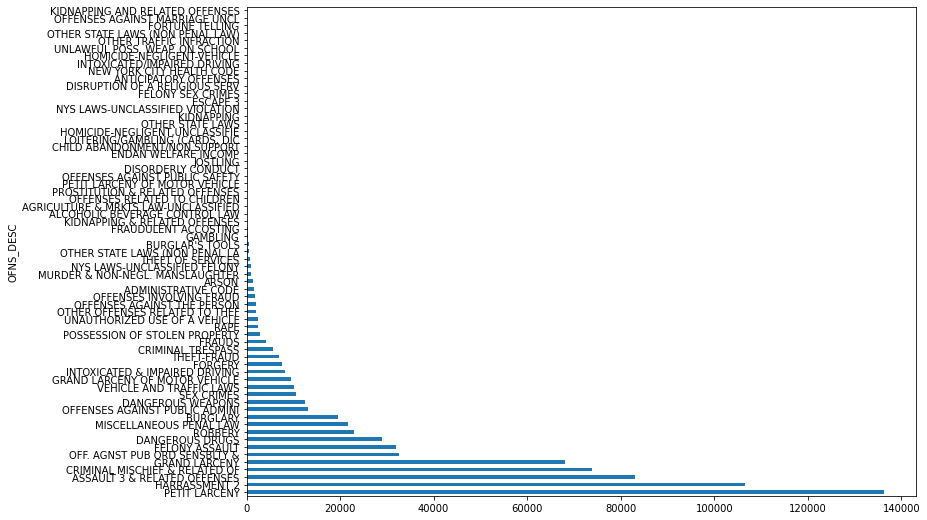

In [205]:
### BEGIN SOLUTION
summation = df.groupby(['OFNS_DESC']).size().sort_values(ascending=False)
print(summation)
summation.plot.barh()


### END SOLUTION

### 3.2 Getting a Better Plot
The plot above can be messy as it plots all offenses. Plot only the offenses that has more than 10000 calls

<AxesSubplot:ylabel='OFNS_DESC'>

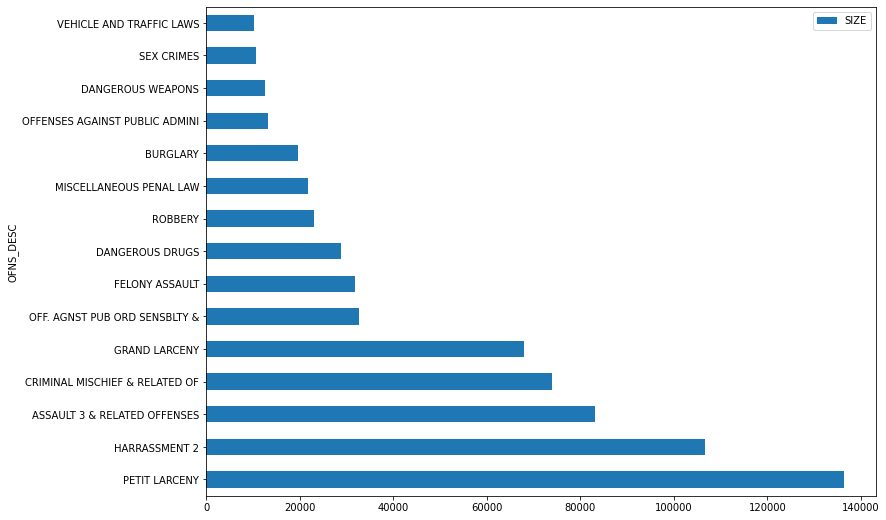

In [241]:
### BEGIN SOLUTION
sized = df.groupby(['OFNS_DESC']).size().to_frame().reset_index().rename(columns={0:'SIZE'}).sort_values('SIZE', ascending=False).set_index('OFNS_DESC')
sized[sized['SIZE'] > 10000].plot.barh()
### END SOLUTION

By contrast, the Seaborn library provides a specific function `countplot` built for plotting counts. It operates directly on the DataFrame itself i.e. there's no need to call `value_counts()` at all. This higher level approach makes it easier to work with. Use the y-label ("Crime Category"), x-label("Number of Calls") and title_of_plot("Number of Calls By Crime Type"

<AxesSubplot:xlabel='count', ylabel='OFNS_DESC'>

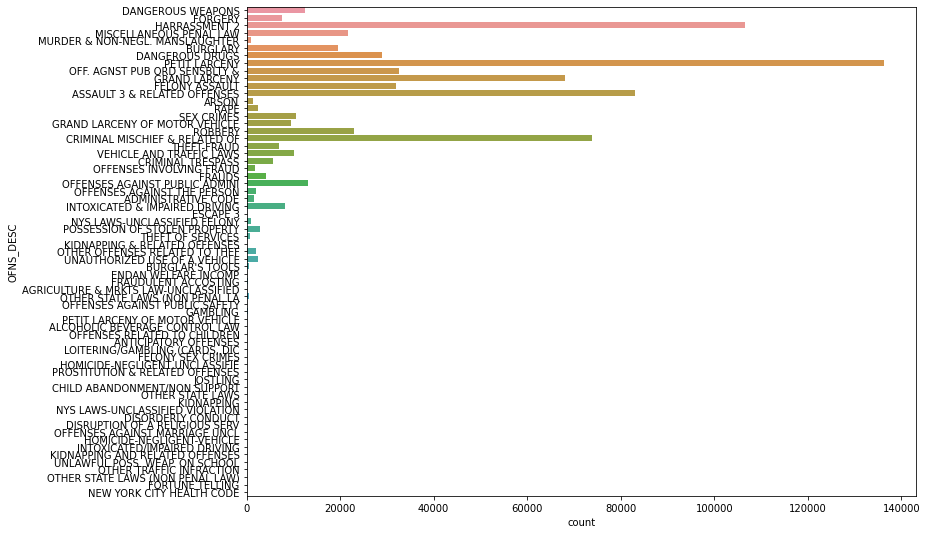

In [249]:
### BEGIN SOLUTION
#offenses = sns.load_dataset(df)
sns.countplot(y="OFNS_DESC", data=df)
### END SOLUTION

You may note that the ordering might be different for the seaborn plot (as compared to pandas plot). If we want the same ordering that we had in the pandas plot, we can use the order parameter of the `countplot` method. It takes a list of strings corresponding to the axis to be ordered. By passing the index of the `value_counts`, you can get the order you want.

<AxesSubplot:xlabel='count', ylabel='OFNS_DESC'>

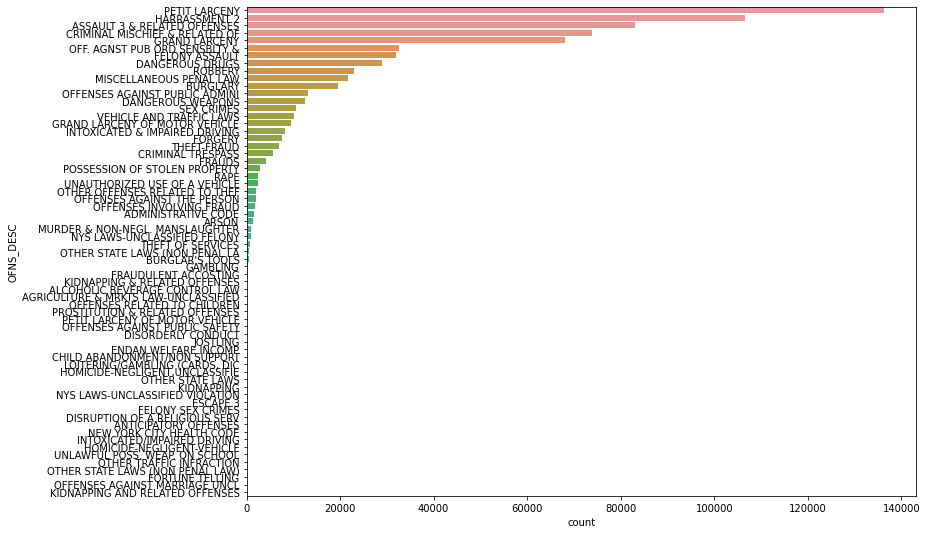

In [308]:
### BEGIN SOLUTION
ordered = df.loc[:,['OFNS_DESC']].value_counts().reset_index()
#ordered.rename(columns={0:'count'})
ordered_names = ordered['OFNS_DESC'].unique()
ordered
ordered_names
sns.countplot(y="OFNS_DESC", data=df, order=ordered_names)
### END SOLUTION

Now we have a pretty bar plot with the bars ordered by size. Though `seaborn` appears to provide a superior plot from a aesthetic point of view, the `pandas` plotting library is also good to understand. You'll get practice using both libraries in the following questions.

## An Additional Note on Plotting in Jupyter Notebooks

You may have noticed that many of our code cells involving plotting end with a semicolon (;). This prevents any extra output from the last line of the cell that we may not want to see. Try adding this to your own code in the following questions!

### 3.3 making more plots

Now it is your turn to make some more plots using `pandas` and `seaborn`. Let's start by looking at the distribution of calls over days of the week.

The CMPLNT_FR_DT field contains the date of the event. We would like to add a new column to the DataFrame that includes Day of the week (DAY_OF_WEEK) that indicates the day of the week. This can help us analyze the crimes on a specific day of the week. For example, we can answer questions such as "what day of the week that a LARSON is likely to happen in NYC?"


Add a new column `DAY_OF_WEEK` into the `calls` dataframe that has the day string (eg. 'Sunday') for the corresponding value in CMPLNT_FR_DT. For example, if the first 3 values of `CMPLNT_FR_DT` are `['01/27/2006, '01/28/2006, '01/29/2006]`, then the first 3 values of the `DAY_OF_WEEK` column should be `["Friday", "Saturday", "Sunday"]`.

**Hint:** *Try using the [Series.map](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) function on `calls["OFNS_DESC"]`.  Can you assign this to the new column `calls["DAY_OF_WEEK"]`?*

<AxesSubplot:xlabel='count', ylabel='DAY_OF_WEEK'>

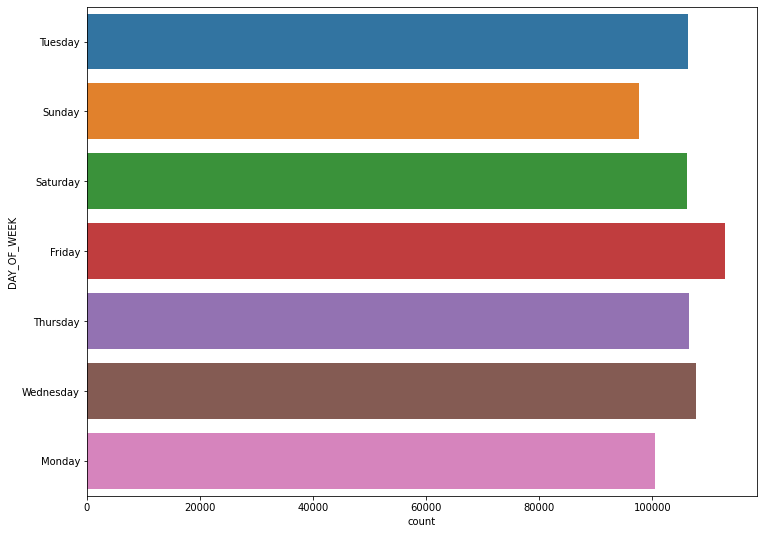

In [357]:
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
### BEGIN SOLUTION
import datetime as dt
import re

def date_valid(date):
    if not (type(date) == str):
        return False
    if(re.search("(0[0-9])|(1[0-1])/([0-2][0-9]||3[0-1])/([0-9]{4})", date)):
        return True
    return False


def date_to_DOW(date : str):
    if type(date) == float:
        print(date)
    #if date == "nan":
    #    return None
    day_arr = date.split("/")
    #print(day_arr)
    new_date = dt.datetime(int(day_arr[2]), int(day_arr[0]), int(day_arr[1]))
    
    return new_date.strftime('%A')

date_to_DOW("12/03/1967")

days_of_week = df.loc[:, 'CMPLNT_FR_DT']
offenses1 = df.loc[:, 'OFNS_DESC']
days_of_week = days_of_week.map(lambda x : date_to_DOW(x) if (date_valid(x)) else None)
days_of_week = days_of_week.rename('DAY_OF_WEEK')
#print(days_of_week)
od_dow = offenses1.to_frame().merge(days_of_week.to_frame(), left_index=True, right_index=True)
calls = od_dow

#lambda x : dt.datetime.strptime(x, '%m/%d/%Y').strftime('%A')
### END SOLUTION

### 3.4 Seaborn plots

Create a `seaborn` plot that shows the number of calls for each day of the week. You may want to use of the `rotation` argument in `ax.set_xticklabels`, which rotates the labels by 90 degrees.

[Text(0, 0, 'Sunday'),
 Text(1, 0, 'Monday'),
 Text(2, 0, 'Tuesday'),
 Text(3, 0, 'Wednesday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Friday'),
 Text(6, 0, 'Saturday')]

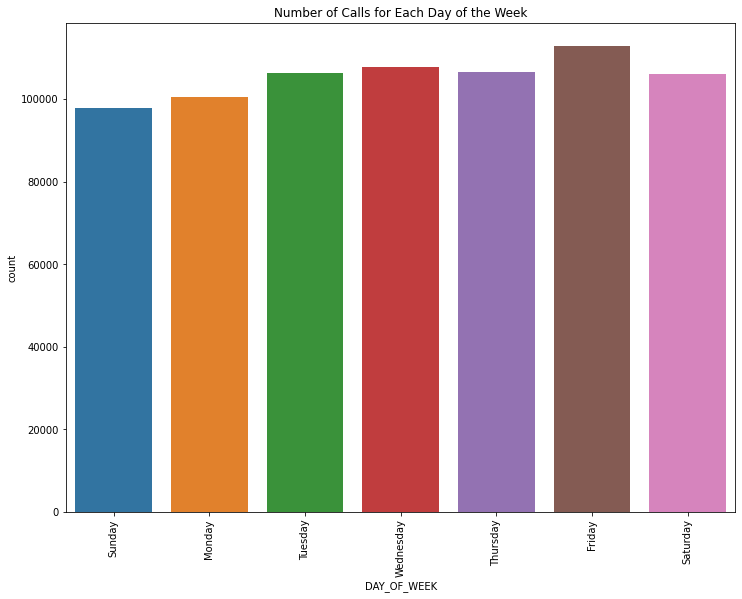

In [364]:
### BEGIN SOLUTION
ax = sns.countplot(x="DAY_OF_WEEK", data=calls, order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
ax.set_title('Number of Calls for Each Day of the Week')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
### END SOLUTION

Now, let's make the same plot using `pandas`. Construct a vertical bar plot with the count of the number of calls (entries in the table) for each day of the week **ordered by the day of the week** (eg. `Sunday`, `Monday`, ...). Do not use `sns` for this plot. Be sure that your axes are labeled and that your plot is titled.

**Hint:** *Given a series `s`, and an array `coolIndex` that has the same entries as in `s.index`, `s[coolIndex]` will return a copy of the series in the same order as `coolIndex`.*

<AxesSubplot:xlabel='DAY_OF_WEEK'>

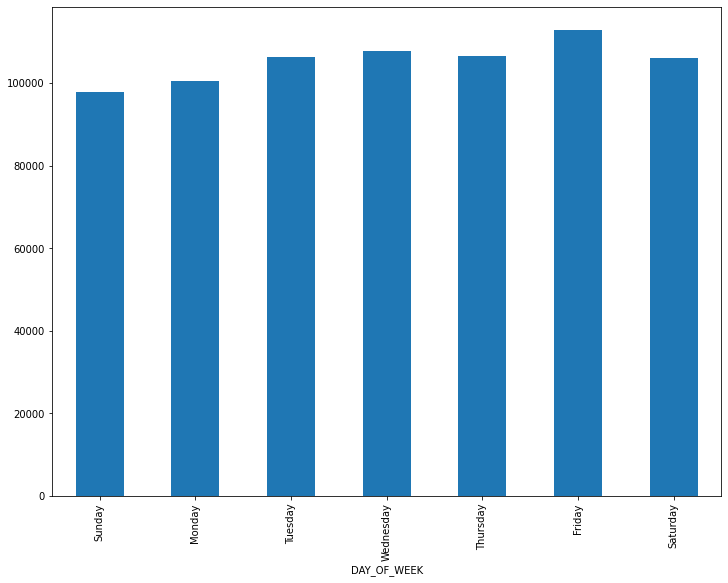

In [378]:
### BEGIN SOLUTION
#summation = df.groupby(['OFNS_DESC']).size()
#df.groupby(['OFNS_DESC']).size().to_frame().reset_index().rename(columns={0:'SIZE'}).sort_values('SIZE', ascending=False).set_index('OFNS_DESC')
days1 = calls.groupby('DAY_OF_WEEK').size()
days1[days].plot.bar()

### END SOLUTION

## 3.5 What Day of the Week is more calls?

Is it true that weekdays generally have slightly more calls than Saturday or Sunday? What can you say about the difference?

##### BEGIN SOLUTION
Sunday has the least amount of calls, and Friday has the most amount of calls. Since Saturday has a relatively high call count, it is generally not true that weekdays have slightly more calls than weekends.
##### END SOLUTION

We can break down into some particular types of events to see their distribution. For example, let's make a bar plot for the OFNS_DESC "HARRASSMENT 2". Which day is the peak for "HARRASSMENT 2"?

This time, use `seaborn` to create a vertical bar plot of the number of total noise violations reported on each day of the week, again ordered by the days of the week starting with Sunday. Do not use `pandas` to plot.

**Hint:** *If you're stuck, use the code for the seaborn plot in above question as a starting point.*

[Text(0, 0, 'Sunday'),
 Text(1, 0, 'Monday'),
 Text(2, 0, 'Tuesday'),
 Text(3, 0, 'Wednesday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Friday'),
 Text(6, 0, 'Saturday')]

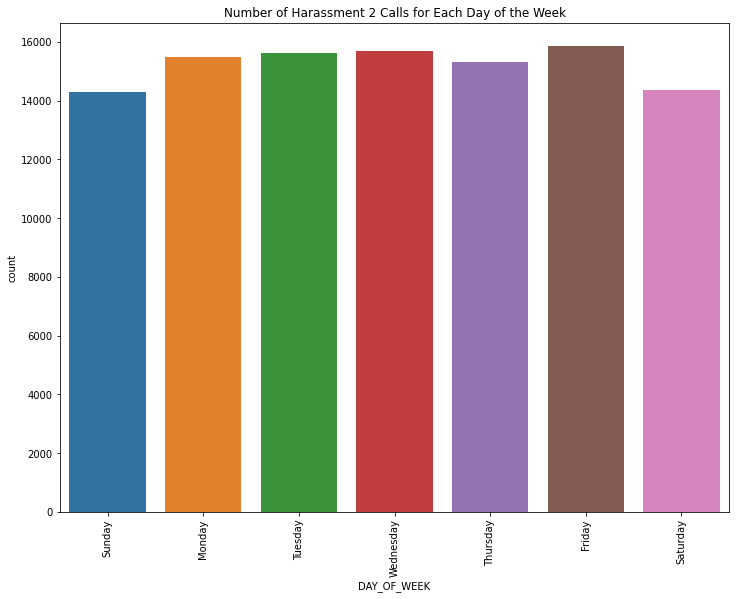

In [381]:
### BEGIN SOLUTION
#assuming we are making the plot with harassment 2, because instructions unclear
h2_dow = calls[calls['OFNS_DESC'] == 'HARRASSMENT 2']
ax = sns.countplot(x="DAY_OF_WEEK", data=h2_dow, order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
ax.set_title('Number of Harassment 2 Calls for Each Day of the Week')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
### END SOLUTION

### 3.6 

Do you see anything interesting about the distribution of HARRASSMENT 2 calls over a week? Type a short answer below.
##### BEGIN SOLUTION
Harassment 2 calls peak on fridays, which is the day when many people go to bars. Aditionally, here it is clear that harrassment 2 calls are slightly lower in the weekends.

##### END SOLUTION

### 3.7 More Plots

Let's look at a similar distribution but for a crime we have much more calls data about. In the cell below, create the same plot as you did in previous questions, but now looking at instances of the OFNS_DESC "BURGLARY" (instead of "HARRASSMENT 2"). Use either `pandas` or `seaborn` plotting as you desire.

[Text(0, 0, 'Sunday'),
 Text(1, 0, 'Monday'),
 Text(2, 0, 'Tuesday'),
 Text(3, 0, 'Wednesday'),
 Text(4, 0, 'Thursday'),
 Text(5, 0, 'Friday'),
 Text(6, 0, 'Saturday')]

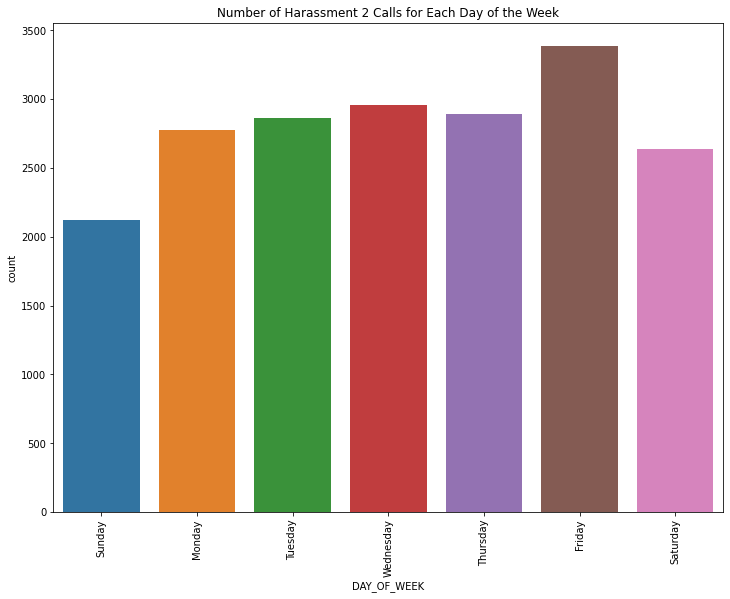

In [383]:
### BEGIN SOLUTION
h2_dow = calls[calls['OFNS_DESC'] == 'BURGLARY']
ax = sns.countplot(x="DAY_OF_WEEK", data=h2_dow, order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
ax.set_title('Number of Harassment 2 Calls for Each Day of the Week')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
### END SOLUTION

### 3.8 time of events

Now let's look at the CMPLNT_TO_TM column which indicates the time for events. Since it contains hour and minute information, let's extract the hour info and create a new column named `Hour` in the `calls` dataframe. You should save the hour as an `int`. Then plot the frequency of each hour in the table (i.e., `value_counts()`) sorted by the hour of the day (i.e., `sort_index()`).

You will want to look into how to use:

* [Series.str.slice](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.slice.html#pandas.Series.str.slice) to select the substring.
* [Series.astype](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html) to change the type.

**Hint:** *The `str` helper member of a series can be used to grab substrings.  For example, `calls["CMPLNT_TO_TM"].str.slice(3,5)` returns the minute of each hour of the `CMPLNT_TO_TM`.*

In [385]:
calls["Hour"] = calls["CMPLNT_TO_TM"].str.slice(0,2).replace(np.NaN,0).astype('int')

KeyError: 'CMPLNT_TO_TM'

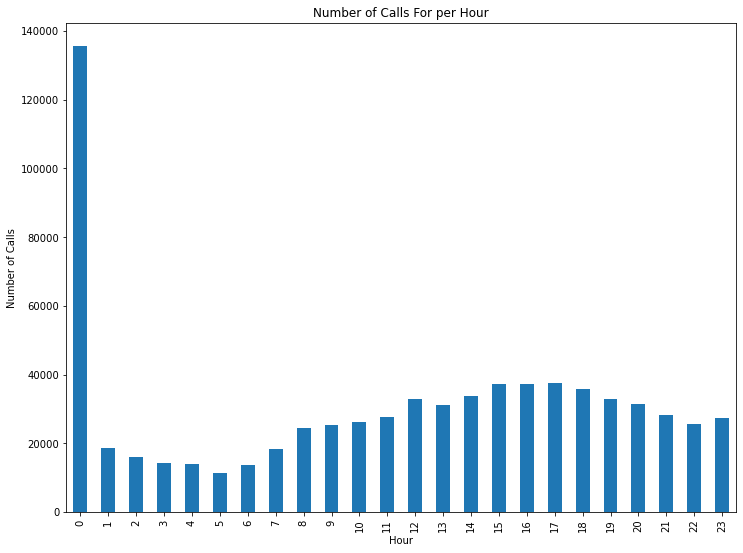

In [31]:
### BEGIN SOLUTION

### END SOLUTION

Create a pandas bar plot showing the number of BURGLARY crimes committed at each hour of the day. Use the labels
* ax.set_xlabel("Hour of the Day")
* ax.set_ylabel("Number of Calls")
* ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week");

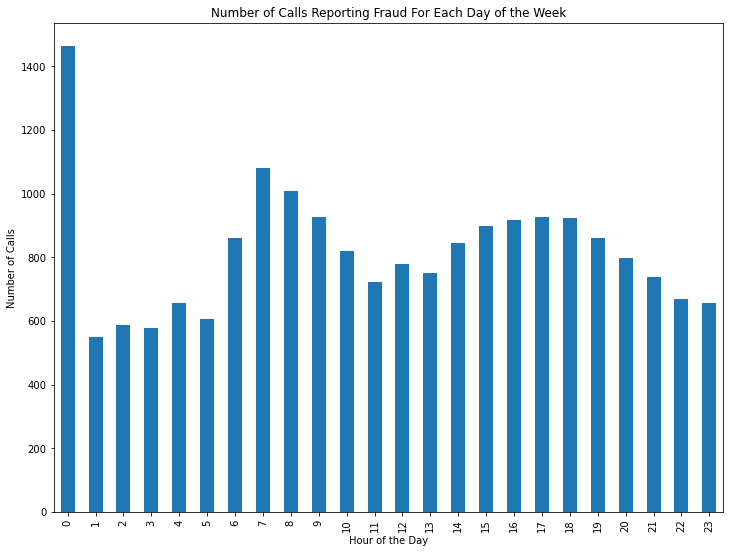

In [32]:
### BEGIN SOLUTION


### END SOLUTION

### 3.9 More plots

In the cell below, create a seaborn plot of the same data. Again, make sure you provide axes labels and a title for your plot.

C:\Users\andyg\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


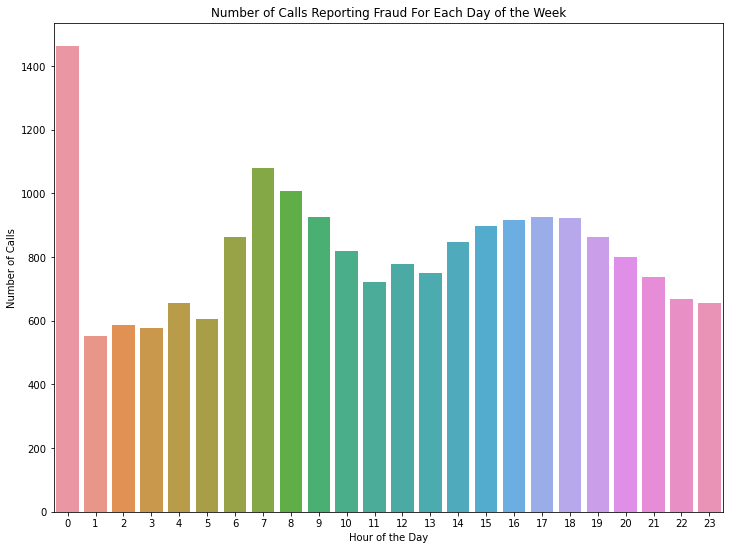

In [33]:
### BEGIN SOLUTION

### END SOLUTION

### 3.8 Spike in burglary?

According to your plots, is there a spike in calls reporting BURGLARY at any particular time? If so, Do you trust that this spike is legitimate, or could there be an issue with our data? Explain your reasoning in 1-2 sentences below.

#### BEGIN SOLUTION


#### END SOLUTION

In the cell below, we generate a boxplot which examines the hour of day of each crime broken down by the `OFNS_DESC` value.  To construct this plot we used the [DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html) documentation.

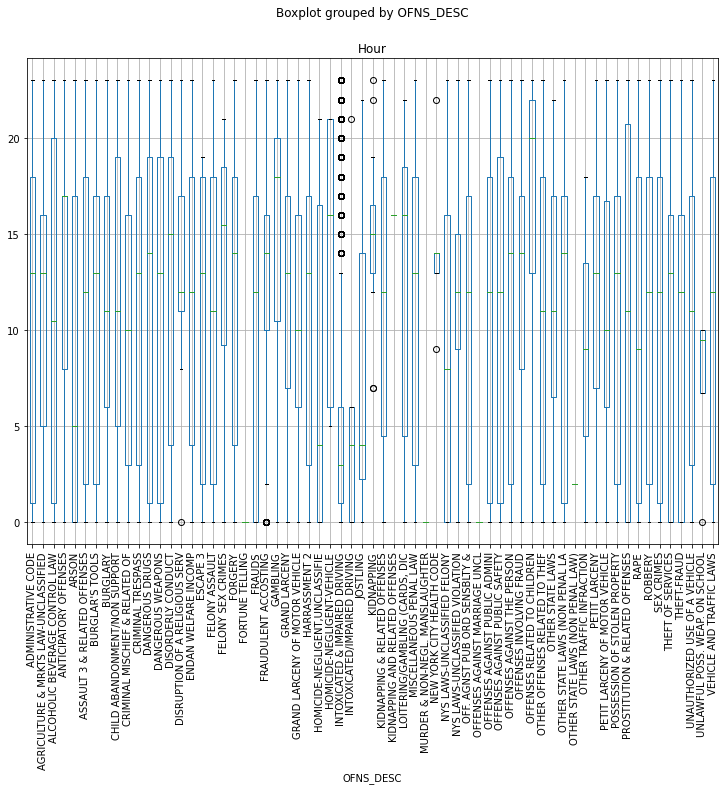

In [34]:
calls.boxplot(column="Hour", by='OFNS_DESC', rot=90);

While the pandas boxplot is informative, we can use seaborn to create a more visually-appealing plot. Using seaborn, regenerate a better box plot. See either the textbook (https://www.textbook.ds100.org/ch/06/viz_quantitative.html) or the [seaborn boxplot documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

Looking at your plot, which crime type appears to have the largest interquartile range? Put your results into `answer` as a string.

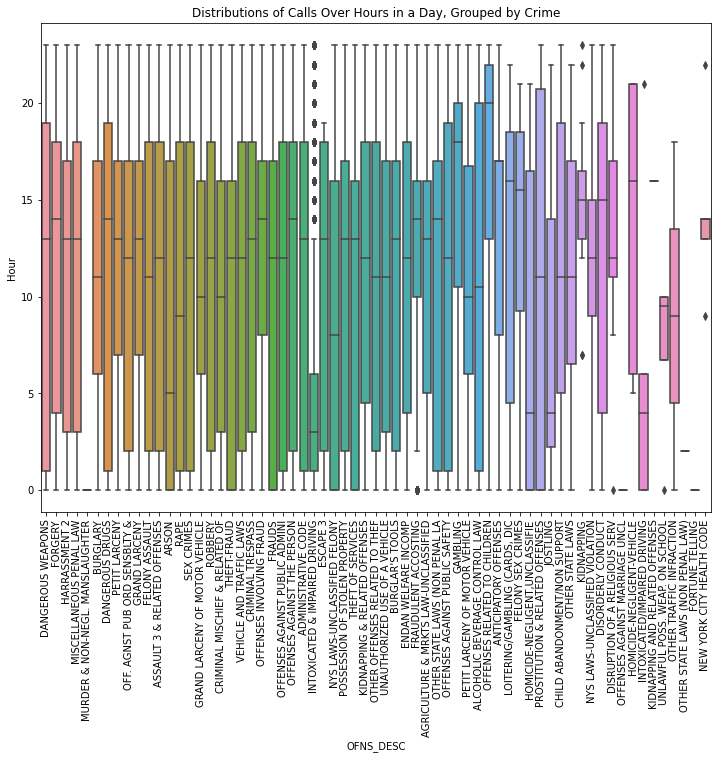

In [36]:
# Todo: Make a boxplot with seaborn
### BEGIN SOLUTION


### END SOLUTION

### 3.9 - Visualization of crimes on a Map of NYC
finally we attempt to visualize the crimes committed in NYC on a Map. First we need to installing some mapping software. run the cell below to install folium package for mapping software.

In [37]:
!pip install --upgrade folium

In [38]:
buNYC = calls[calls["OFNS_DESC"] == "BURGLARY"][:20]
len(buNYC)

20

In [39]:
### Plot the maps for BURGLARY in NYC
### if it takes too much time or map does not show up, try plotting a subset of the data set of for a specific crime
import folium
### BEGIN SOLUTION

### END SOLUTION

In [40]:
map1

 ## Congratulations !!!

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> Output:</b> Please **remove all output** from your notebook prior to submission<br>
<b> Data:</b> **DO NOT** submit any data files. You may lose points if you do so<br>
<b> File Name:</b> Please name the file as your_section_your_netID_Lab3.ipynb (eg. 01_adg133_Lab3.ipynb<br>
<b> Submit To: </b> Canvas &rarr; Assignments &rarr; Lab3 <br>
<b>Warning:</b> Failure to follow directions may result in loss of points.<br>
</div>

@2021 A.D. Gunawardena. Many people contributed to this lab including CS439 TA Liqin Long (currently @ Google). Much credit go to my friend and Princeton colleague Prof. Josh Hug (@ Berkeley), and Berkeley Data Science Group for their contributions to the original version. Please DO NOT share this lab and/or post them on public sites.